In [39]:
import matplotlib.pyplot as plt
import numpy as np
import math 

In [394]:
S = 5000 #размерность матрицы    
L = 40 # длина ящика для нулевых краевых условий
dx = L/(S+2)
x = np.linspace(-L/2+dx, L/2-dx, S) # список xi от -L/2+dx до L/2-dx
k = 1/(2*dx**2)
dx


0.007996801279488205

In [395]:
def V(coor):
    return coor**2

## m = 1, $\hbar=1$ 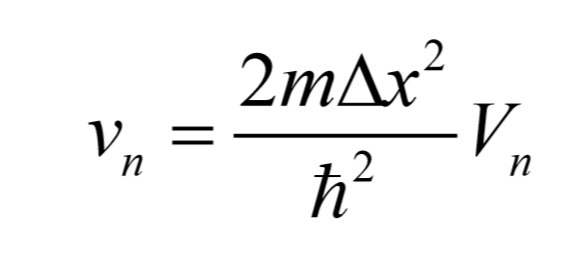

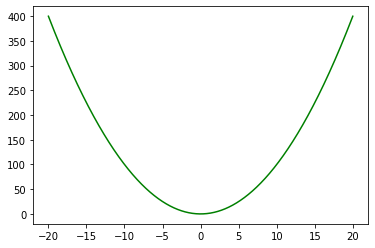

In [396]:
v = V(x)#*2*dx**2
plt.plot(x, v, color="green", label="V(x)")      
#plt.plot(x, V(x), color="green", label="V(x)")      
plt.show()

In [397]:
# построение матрицы Гамильтона
h = np.zeros((S,S))
for i in range(S-1):
    h[i+1][i] = -1*k
    h[i][i+1] = -1*k
for i in range(S):
    h[i][i] = 2*k + v[i]
#h[S-1][S-1]
print("1й, 2й и последний элементы диагонали:", h[0][0],h[1][1],h[-1][-1])

1й, 2й и последний элементы диагонали: 16037.18269189765 16036.862947756927 16037.18269189765


In [398]:
eigvals, eigvecs = np.linalg.eigh(h)



In [399]:
np.shape(eigvecs)

(5000, 5000)

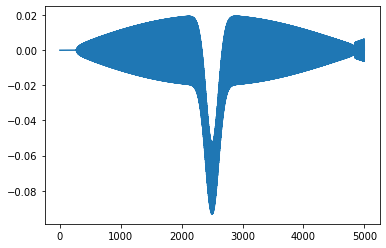

In [400]:
np.shape(eigvecs[0])
np.shape(eigvecs[:,0])
khm = eigvecs[0] - eigvecs[:,0] #eigvecs - матрица SxS. Первая запись ее строка, вторая - столбец
plt.plot(khm)                   # все красиво работает для столбца, но пока совершенно неочевидно почему
plt.show()

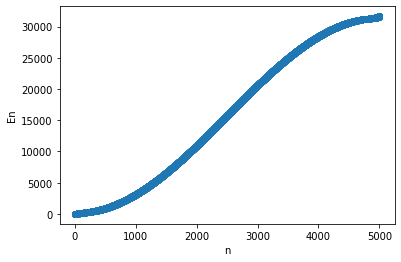

In [401]:
# построение зависимости энергии от номера уровня
# зависимость для всех уровней (необрезанная) довольно кривая
plt.plot(eigvals,'o')
plt.xlabel("n")
plt.ylabel("En")
plt.show()

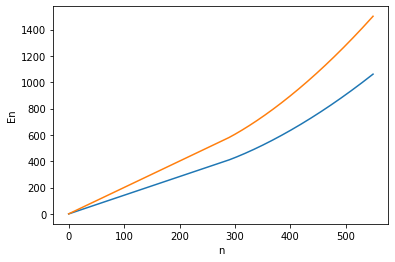

In [404]:
# построение зависимости энергии от номера уровня
n = 550 #номер последнего уровня
plt.plot(eigvals[:n])
plt.plot(eigvals[:n]/eigvals[0]) #нормируем каждый уровень на первый
plt.xlabel("n")
plt.ylabel("En")
plt.show()
 

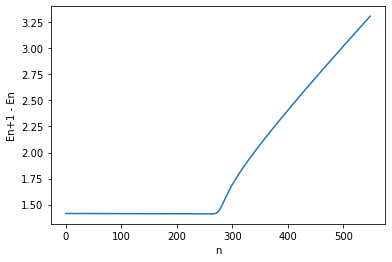

In [405]:
# посмотрим, как изменяется приращение энергии
vals =  eigvals[:n]
dist = [vals[i+1]-vals[i] for i in range(n-1)]
#dist
plt.plot(dist)
plt.xlabel("n")
plt.ylabel("En+1 - En")
plt.show()
# вывод: нельзя брать уровни с n > точки перегиба

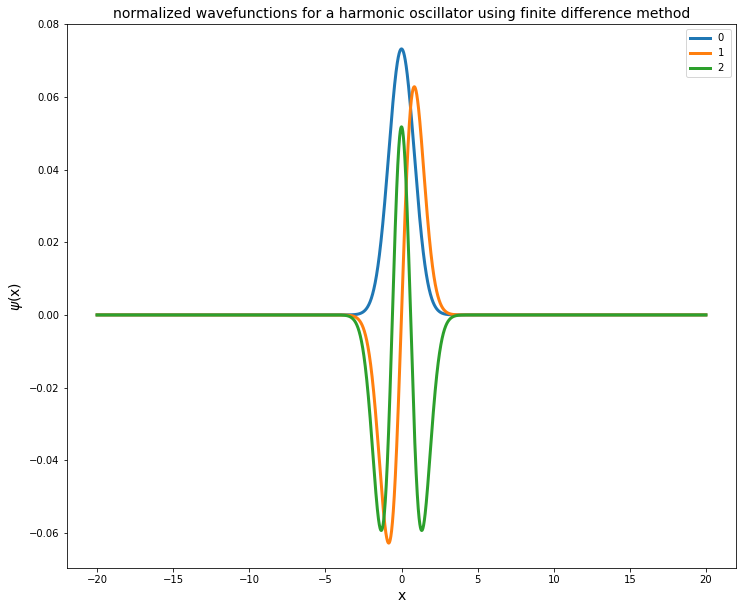

In [406]:
num = 3
plt.figure(figsize=(12,10))
for i in range(num):
    y = []
    y = np.append(y,eigvecs[:,i])
#    y = np.append(y,0)
#    y = np.insert(y,0,0)
    plt.plot(x, y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a harmonic oscillator using finite difference method',size=14)
plt.show()

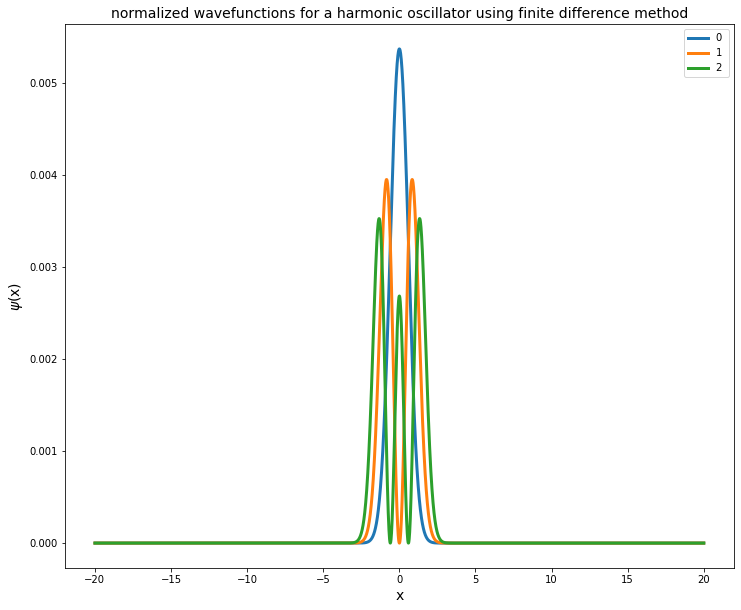

In [409]:
# несколько первых квадратов функций
num = 3
plt.figure(figsize=(12,10))
for i in range(num):
    y = []
    y = np.append(y,eigvecs[:,i])
#    y = np.append(y,0)
#    y = np.insert(y,0,0)
    plt.plot(x,y**2,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a harmonic oscillator using finite difference method',size=14)
plt.show()



#plt.plot(eigvecs[0]**2)
#plt.plot(eigvecs[1]**2)
#plt.plot(eigvecs[2]**2)
#plt.show()

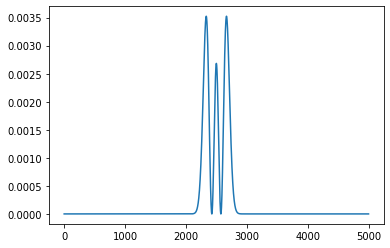

In [410]:
# квадрат третьего уровня
eigx = eigvecs[:,2]**2#/dx
plt.plot(eigx)
plt.show() 

## Алгоритм находит уже нормированный вектор, поэтому $\psi[i]$ - вероятность обнаружения частицы в точке с индексом i

In [412]:
# проверка нормировки
for i in range(6):
    print ("phi^2",i, "=",sum([eigvecs[j][i]**2 for j in range(S)])) # i - индекс столбца 
    #print (sum([eigvecs[i][j] for j in range(S)]))

phi^2 0 = 1.0000000000000009
phi^2 1 = 0.9999999999999998
phi^2 2 = 1.0
phi^2 3 = 1.0
phi^2 4 = 0.9999999999999981
phi^2 5 = 1.0


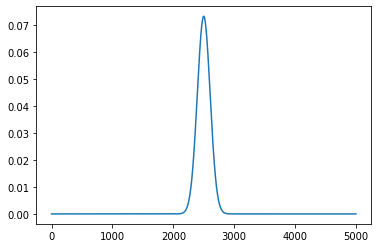

In [413]:
# вектор основного состояния
plt.plot(eigvecs[:,0])
plt.show()

In [418]:
eigvals[int(n/2)] # надо следить, чтобы En<<Vmax, иначе не выполняется условие равентсва 0 волновой функции на концах

389.1567915135591

## сравнение с аналитическими волновыми функциями
# $\omega = \sqrt2$
# $\psi_0=\left(\frac{m\omega}{\pi\hbar}\right)^\frac{1}{4}e^{-\frac{m\omega x^2}{2\hbar}} = \frac{1}{\sqrt{a\sqrt{\pi}}}e^{-\frac{x^2}{2a^2}}$


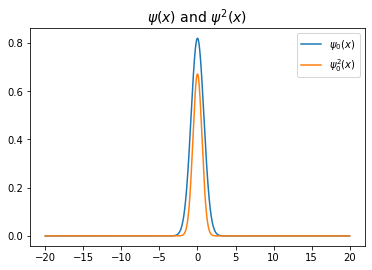

In [496]:
# тут надо подумать какую частоту брать. по идее, она определяется видом потенциала (mw^2/2 = 1, при m = 1 дает w = 2^0.5),
#а также равна удвоенной энергии, 
# если по свойcтвам потенциала
w = math.sqrt(2) #eigvals[0]*2'
a = 1/math.sqrt(w)
pi = math.pi
sqrtpi = math.sqrt(pi)
def psi0(x):
    return math.sqrt(a*sqrtpi)**(-1)*math.e**(-x**2/(2*a**2))
def psi0_2(x):
    return psi0(x)**2
plt.plot(x,psi0(x),label="$\psi_0(x)$")
plt.plot(x,psi0_2(x),label="$\psi_0^2(x)$")
plt.legend()
plt.title('$\psi(x)$ and $\psi^2(x)$',size=14)
#plt.plot(x, psi0_2(x)*dx) # это список psi0(x[i])*dx
plt.show()

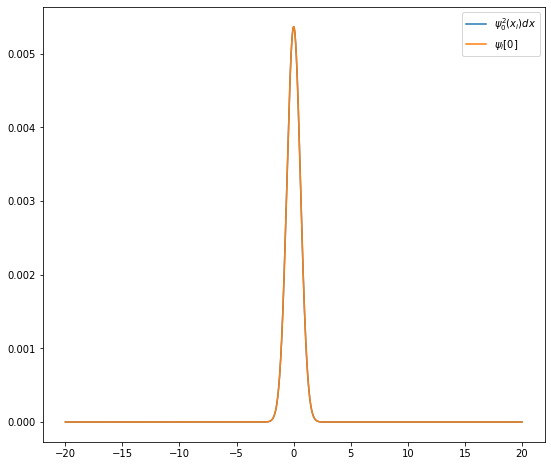

In [500]:
# график численной и аналитической функций, аналитическая слышком высоко
plt.figure(figsize=(9,8))
plt.plot(x, psi0_2(x)*dx,label="$\psi_0^2(x_i)dx$")
plt.plot(x, eigvecs[:,0]**2,label="$\psi_i[0]$")
plt.legend( )
plt.show()

In [501]:
print ("численный интеграл квадрата аналитической функции = ", sum([psi0(x[i])**2*dx for i in range(S)]))

численный интеграл квадрата аналитической функции =  0.9997999999999997


In [502]:
print("квадрат вектора в 0 = ", eigvecs[int(S/2),0]**2)
print("dx на квадрат функции в 0 = ", psi0_2(0)*dx)

квадрат вектора в 0 =  0.005365813183853354
dx на квадрат функции в 0 =  0.00536535999172662


## $\psi_1 = \frac{1}{\sqrt{2a\sqrt{\pi}}}\frac{2x}{a}e^{-\frac{x^2}{2a^2}}$


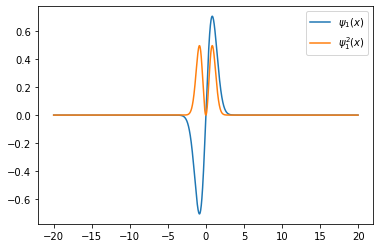

In [503]:
def psi1(x):
    return psi0(x)*math.sqrt(2)*x/a
def psi1_2(x):
    return psi1(x)**2

plt.plot(x,psi1(x),label="$\psi_1(x)$")
plt.plot(x,psi1_2(x),label="$\psi_1^2(x)$")
#plt.plot(x, psi1_2(x)*dx)
plt.legend()
plt.show()

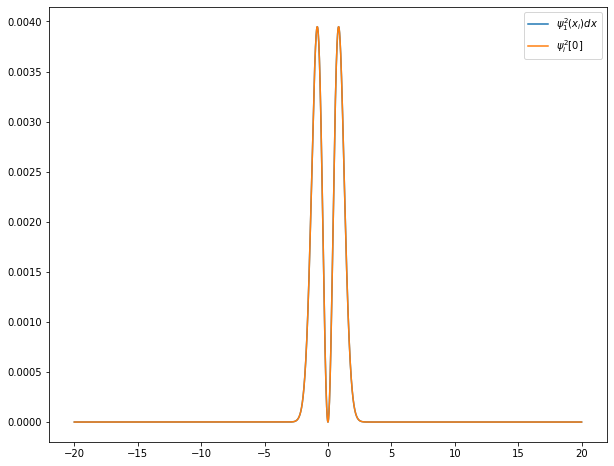

In [504]:
plt.figure(figsize=(10,8)) 
plt.plot(x, psi1_2(x)*dx,label="$\psi_1^2(x_i)dx$")
plt.plot(x, eigvecs[:,1]**2,label="$\psi_i^2[0]$")
plt.legend( )
plt.show()

# построим те же графики, но частоту будем определять с энергии $\varepsilon_n = \frac{\hbar \omega}{2}(n+1/2)$
$ \Delta \varepsilon = \frac{\hbar \omega}{2}$, при $\hbar = 1$ $\omega = 2 \Delta \varepsilon$

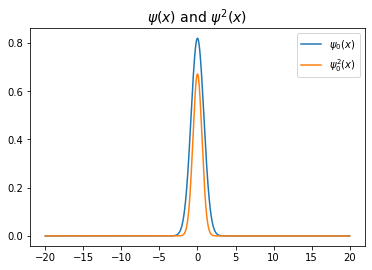

In [515]:
#w1 = dist[0]/2
w1 = dist[0] #обрати внимание: нетт множителя 2!!!
a1 = 1/math.sqrt(w1)
pi = math.pi
sqrtpi = math.sqrt(pi)
def ps0(x):
    return math.sqrt(a1*sqrtpi)**(-1)*math.e**(-x**2/(2*a1**2))
def ps0_2(x):
    return ps0(x)**2
plt.plot(x,ps0(x),label="$\psi_0(x)$")
plt.plot(x,ps0_2(x),label="$\psi_0^2(x)$")
plt.legend()
plt.title('$\psi(x)$ and $\psi^2(x)$',size=14)
#plt.plot(x, psi0_2(x)*dx) # это список psi0(x[i])*dx
plt.show()

In [516]:
print(w1)
print(math.sqrt(2))
print("разность числнной и аналитической частот", w1-math.sqrt(2))

1.4144804678802285
1.4142135623730951
разность числнной и аналитической частот 0.0002669055071333748


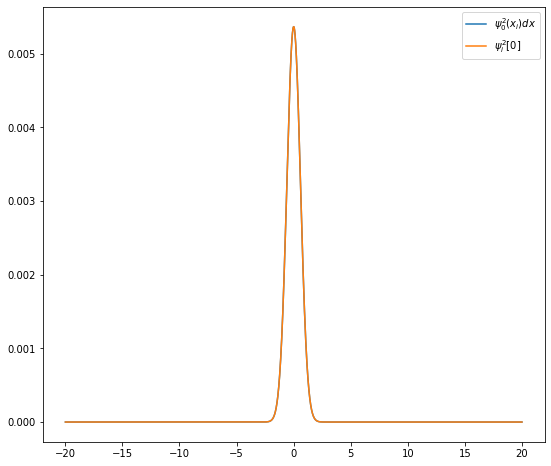

In [517]:
# график численной и аналитической функций, аналитическая слышком высоко
plt.figure(figsize=(9,8))
plt.plot(x, ps0_2(x)*dx,label="$\psi_0^2(x_i)dx$")
plt.plot(x, eigvecs[:,0]**2,label="$\psi_i^2[0]$")
plt.legend( )
plt.show()

In [518]:
print("квадрат вектора в 0 = ", eigvecs[int(S/2),0]**2)
print("dx на квадрат функции в 0 = ", ps0_2(0)*dx)

квадрат вектора в 0 =  0.005365813183853354
dx на квадрат функции в 0 =  0.005365866271897576


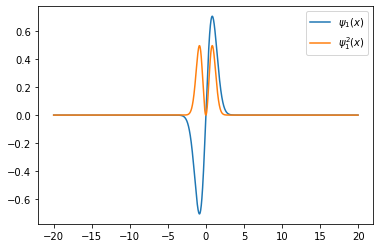

In [521]:
def ps1(x):
    return psi0(x)*math.sqrt(2)*x/a1
def ps1_2(x):
    return psi1(x)**2

plt.plot(x,psi1(x),label="$\psi_1(x)$")
plt.plot(x,psi1_2(x),label="$\psi_1^2(x)$")
#plt.plot(x, psi1_2(x)*dx)
plt.legend()
plt.show()

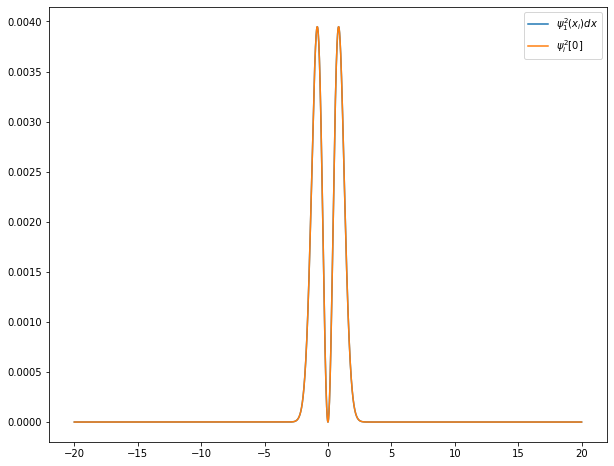

In [522]:
plt.figure(figsize=(10,8)) 
plt.plot(x, ps1_2(x)*dx,label="$\psi_1^2(x_i)dx$")
plt.plot(x, eigvecs[:,1]**2,label="$\psi_i^2[0]$")
plt.legend( )
plt.show()

## Проверка волновой функции с n >> 1

In [241]:
n =100
eigvals[n]

55.94223926663021

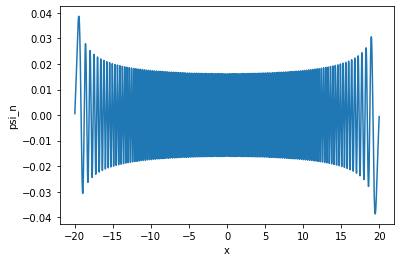

In [424]:
plt.plot(x,eigvecs[:,int(n/2)])
plt.xlabel("x")
plt.ylabel("psi_n")
plt.show()

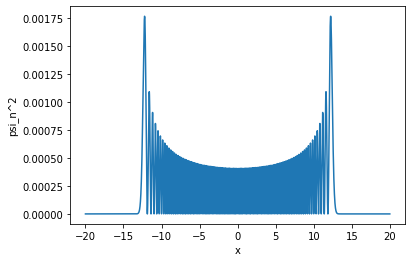

In [427]:
plt.plot(x,eigvecs[:,int(n/5)]**2)#,'o')
plt.xlabel("x")
plt.ylabel("psi_n^2")
plt.show()